In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler , StandardScaler
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor ,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR,LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV



In [ ]:
#my data2
df = pd.read_csv("adult.csv")
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [4]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
#strings to numerical  
df["workclass"] = pd.factorize(df.workclass)[0]
df["education"] = pd.factorize(df.education)[0]
df["marital-status"] = pd.factorize(df["marital-status"])[0]
df["occupation"] = pd.factorize(df.occupation)[0]
df["relationship"] = pd.factorize(df.relationship)[0]
df["native-country"] = pd.factorize(df["native-country"])[0]
df["race"] = pd.factorize(df["race"])[0]
df["gender"] =  df["gender"].apply(lambda x : 1 if x=="Male" else 0)
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,0,226802,0,7,0,0,0,0,1,0,0,40,0,<=50K
1,38,0,89814,1,9,1,1,1,1,1,0,0,50,0,<=50K
2,28,1,336951,2,12,1,2,1,1,1,0,0,40,0,>50K
3,44,0,160323,3,10,1,0,1,0,1,7688,0,40,0,>50K
4,18,2,103497,3,10,0,3,0,1,0,0,0,30,0,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,0,257302,2,12,1,9,4,1,0,0,0,38,0,<=50K
48838,40,0,154374,1,9,1,0,1,1,1,0,0,40,0,>50K
48839,58,0,151910,1,9,2,7,3,1,0,0,0,40,0,<=50K
48840,22,0,201490,1,9,0,7,0,1,1,0,0,20,0,<=50K


In [6]:
df["income"] =  df["income"].apply(lambda x : 1 if x == "<=50K" else 0)
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,0,226802,0,7,0,0,0,0,1,0,0,40,0,1
1,38,0,89814,1,9,1,1,1,1,1,0,0,50,0,1
2,28,1,336951,2,12,1,2,1,1,1,0,0,40,0,0
3,44,0,160323,3,10,1,0,1,0,1,7688,0,40,0,0
4,18,2,103497,3,10,0,3,0,1,0,0,0,30,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,0,257302,2,12,1,9,4,1,0,0,0,38,0,1
48838,40,0,154374,1,9,1,0,1,1,1,0,0,40,0,0
48839,58,0,151910,1,9,2,7,3,1,0,0,0,40,0,1
48840,22,0,201490,1,9,0,7,0,1,1,0,0,20,0,1


In [7]:
x=df.drop("income" , axis=1)
y=df.iloc[: , -1]
scaler = StandardScaler()
x_scaler = scaler.fit_transform(x)
# y_scaler = scaler.transform(X_test)

<ipython-input-8-5224018cd639>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


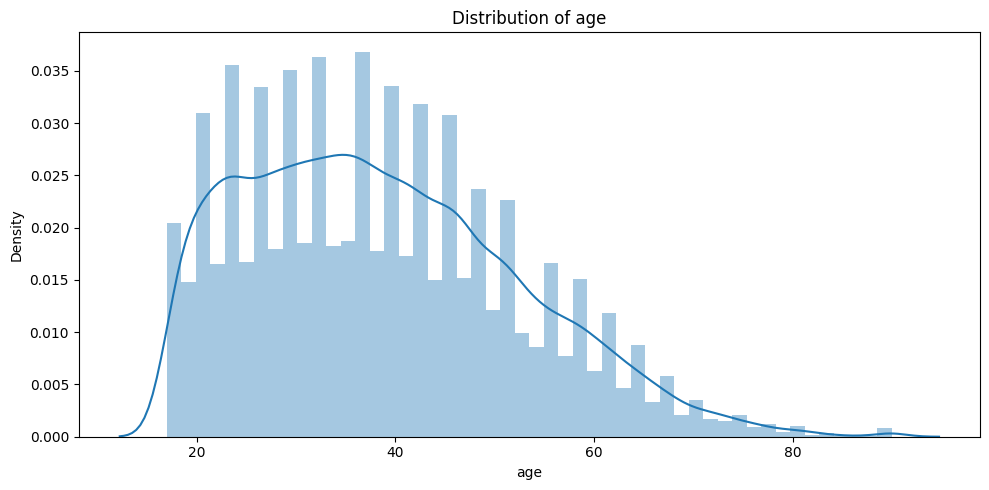

<ipython-input-8-5224018cd639>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


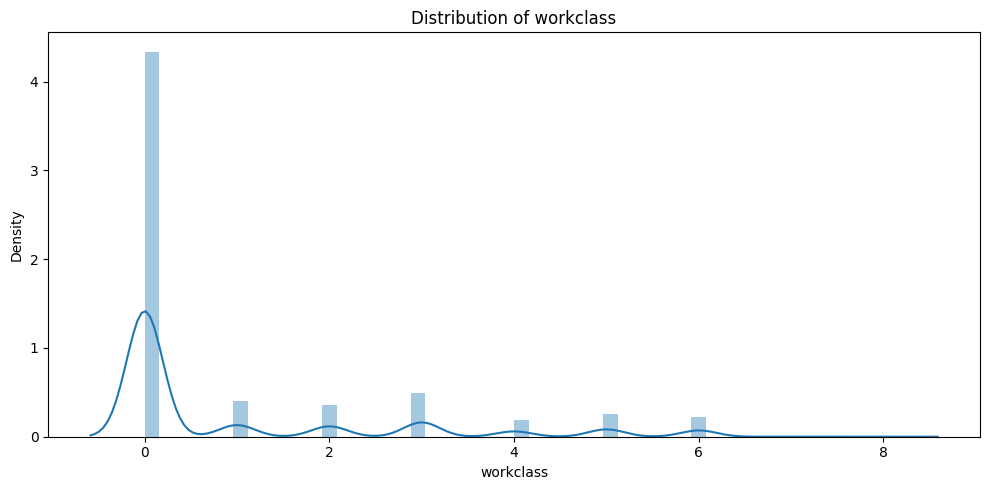

<ipython-input-8-5224018cd639>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


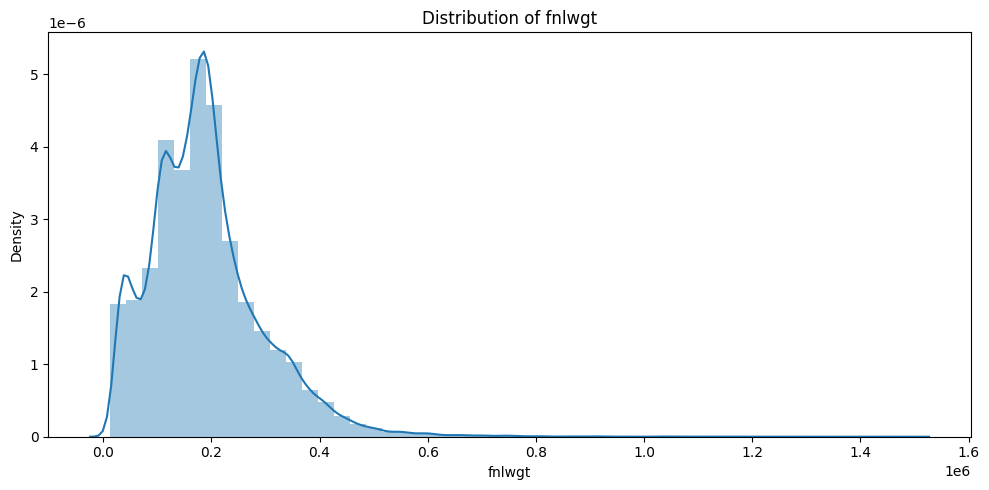

<ipython-input-8-5224018cd639>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


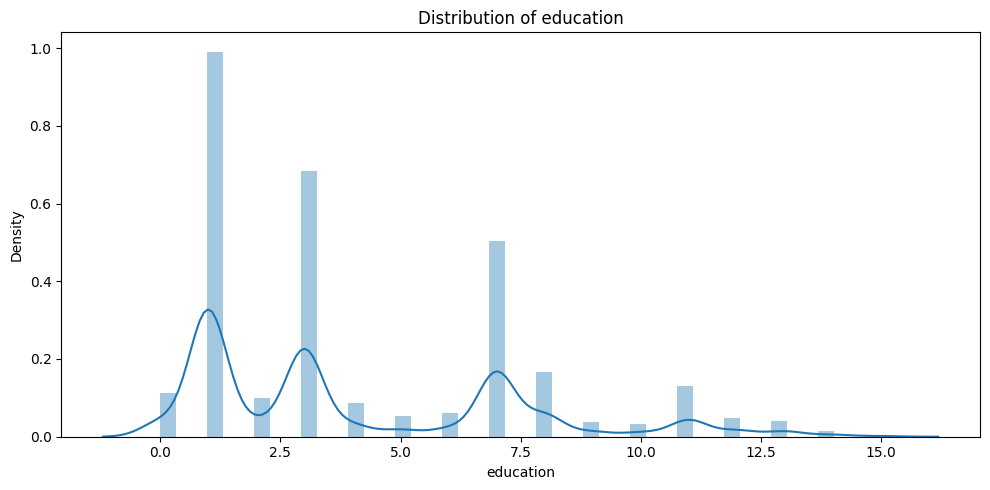

<ipython-input-8-5224018cd639>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


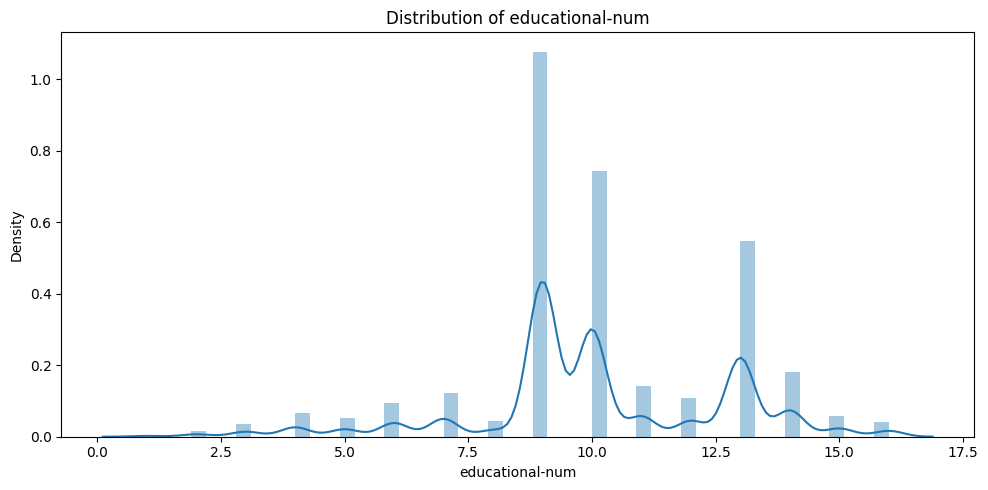

<ipython-input-8-5224018cd639>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


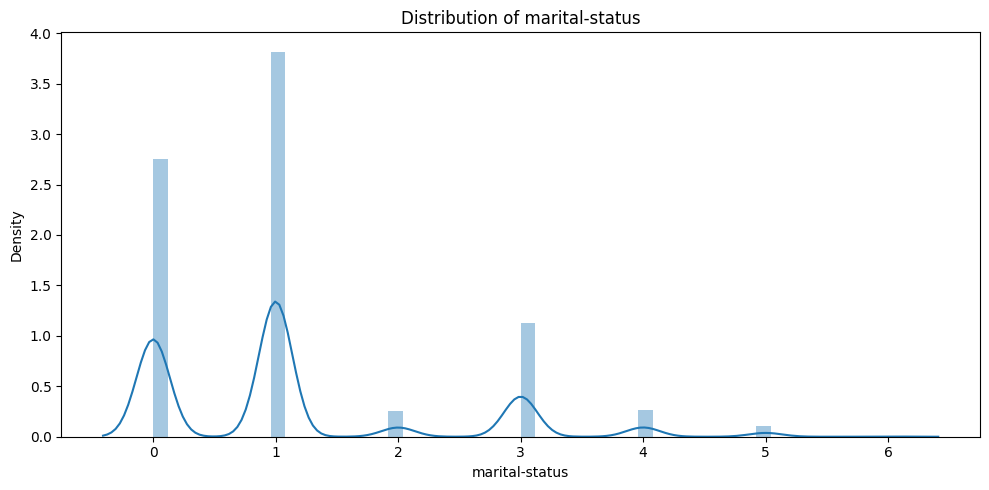

<ipython-input-8-5224018cd639>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


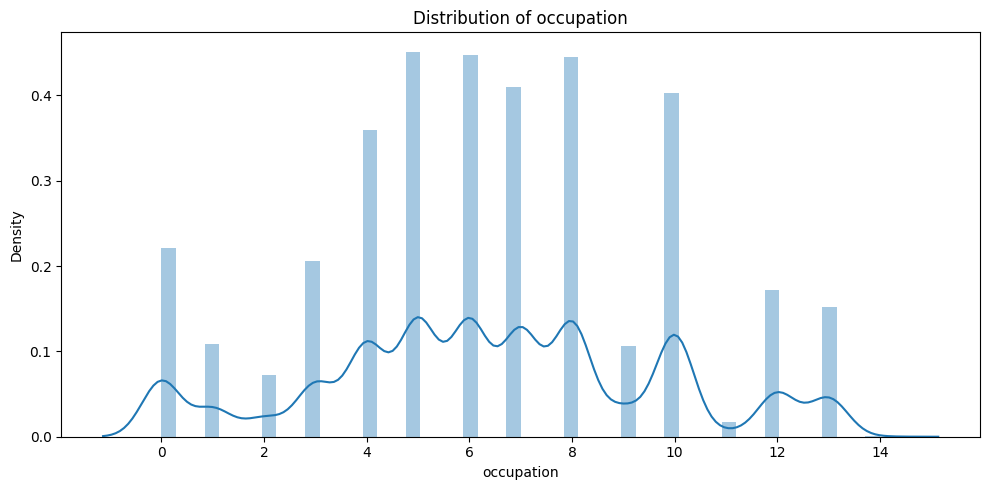

<ipython-input-8-5224018cd639>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


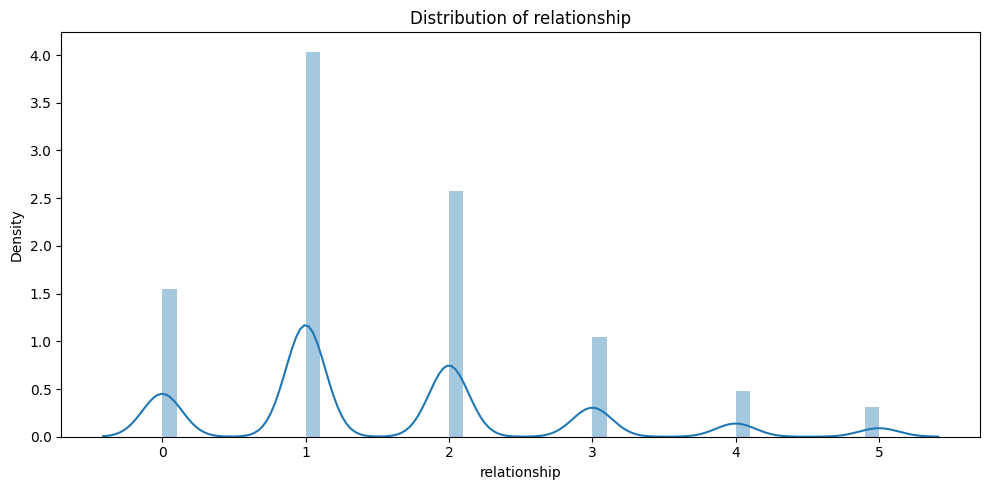

<ipython-input-8-5224018cd639>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


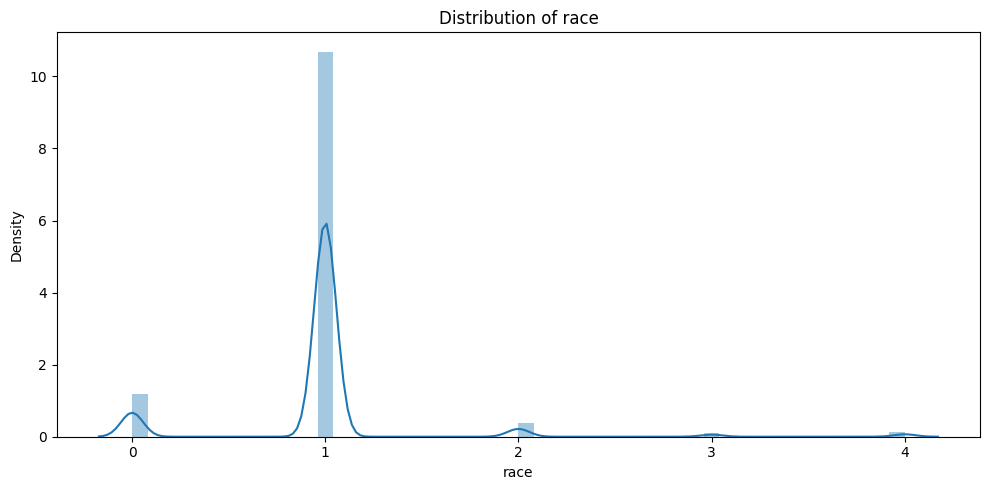

<ipython-input-8-5224018cd639>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


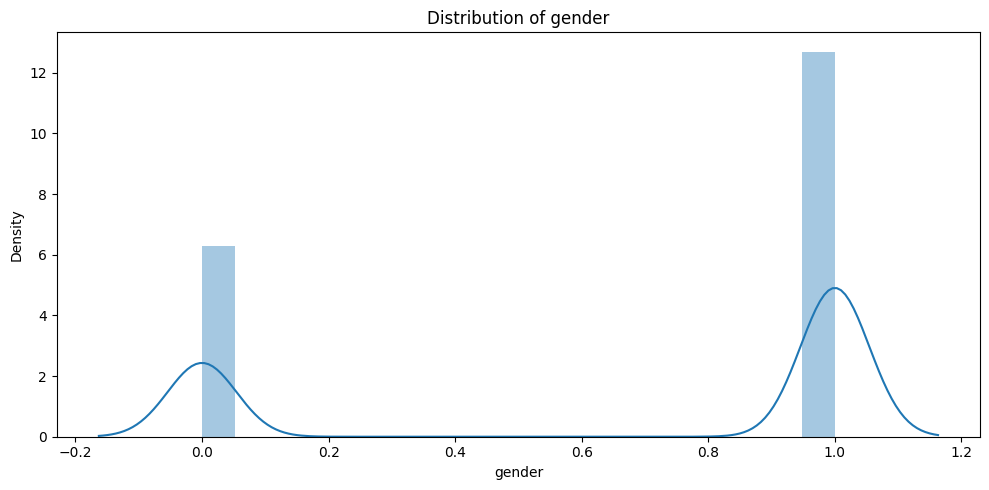

<ipython-input-8-5224018cd639>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


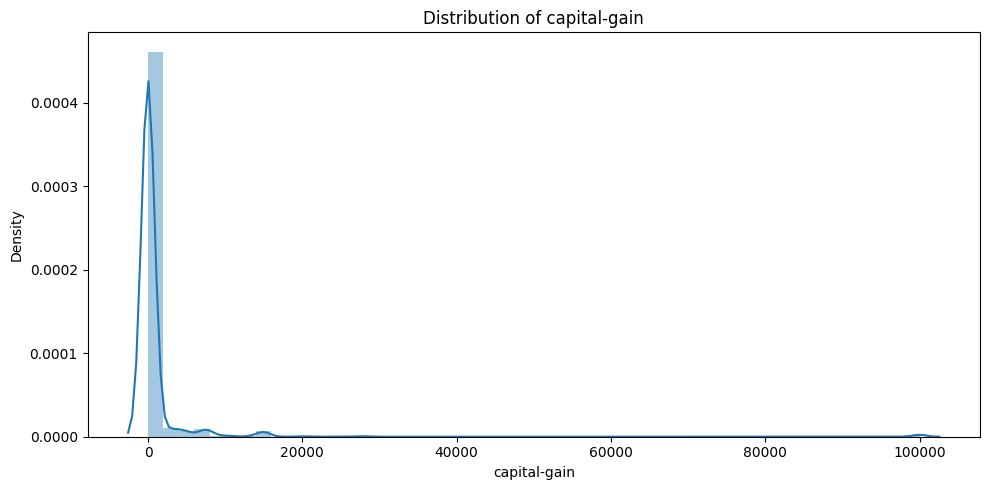

<ipython-input-8-5224018cd639>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


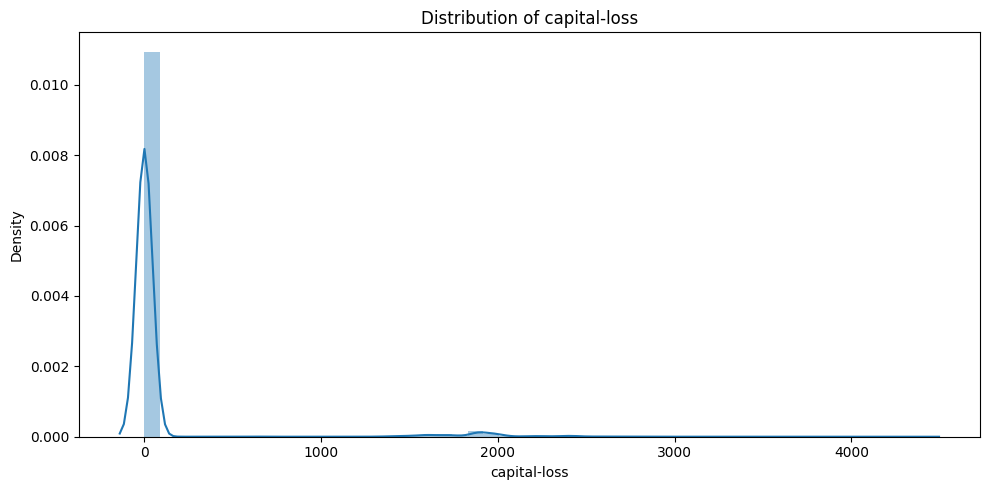

<ipython-input-8-5224018cd639>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


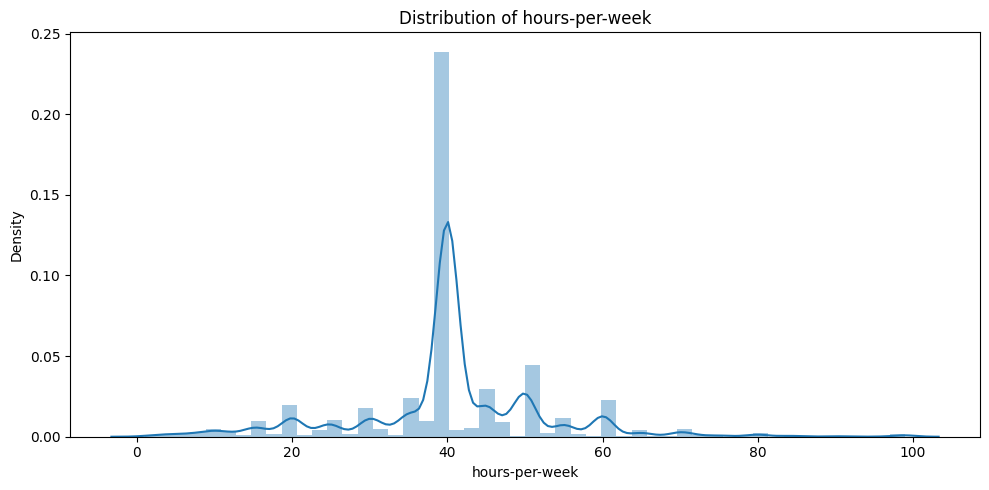

<ipython-input-8-5224018cd639>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


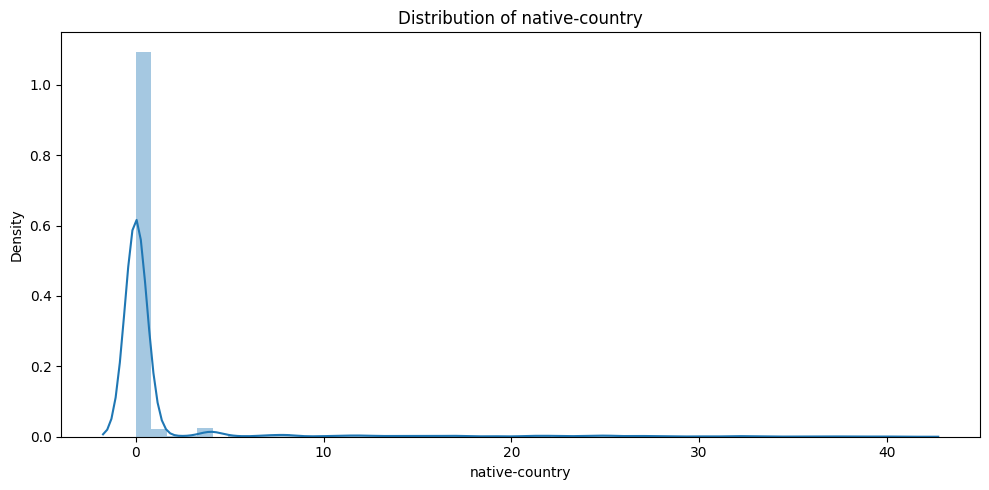

<ipython-input-8-5224018cd639>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


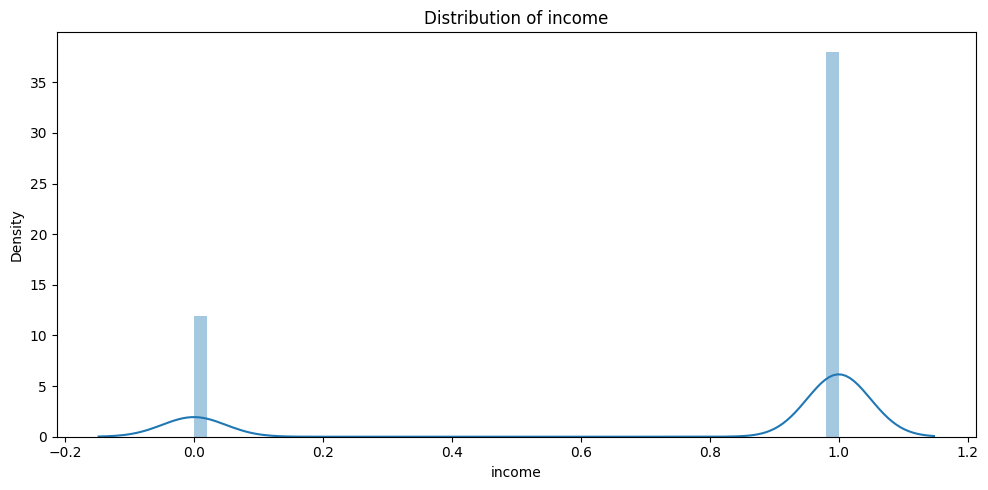

In [8]:
for column in df.columns:
    plt.figure(figsize=(10, 5))
    sns.distplot(df[column])
    plt.title(f'Distribution of {column}')
    plt.tight_layout()
    plt.show()

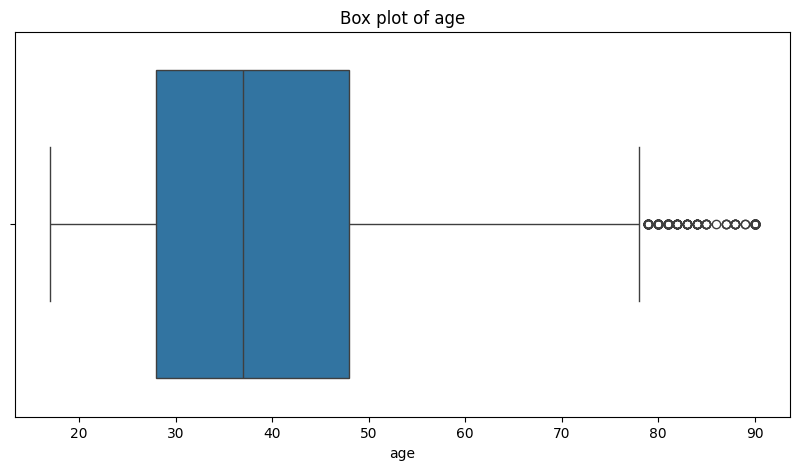

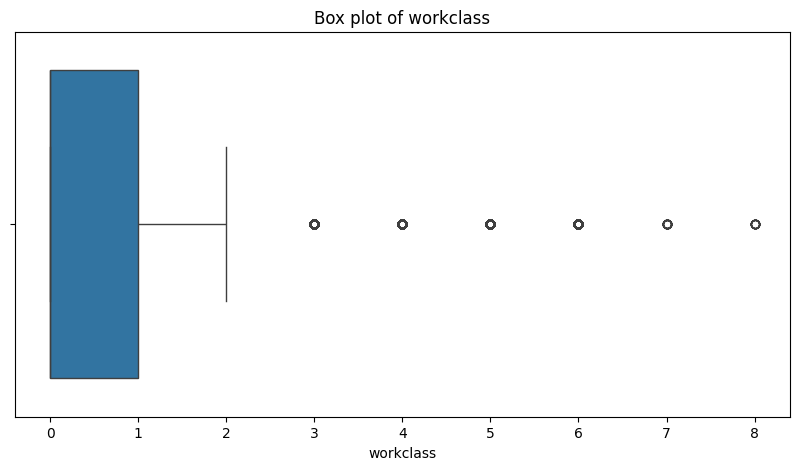

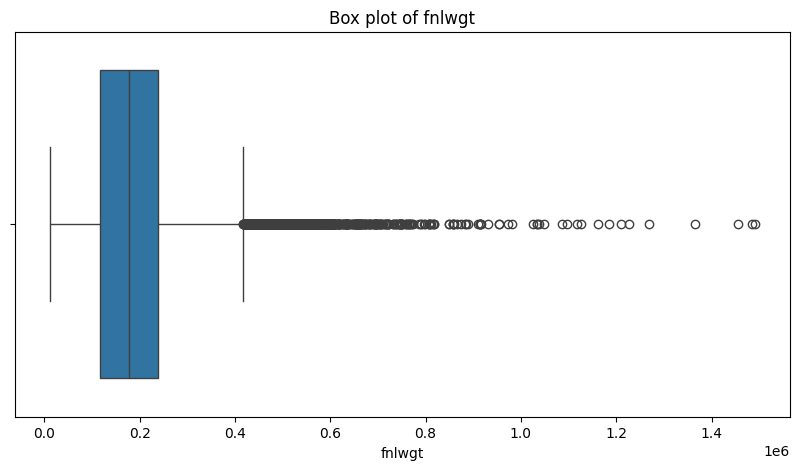

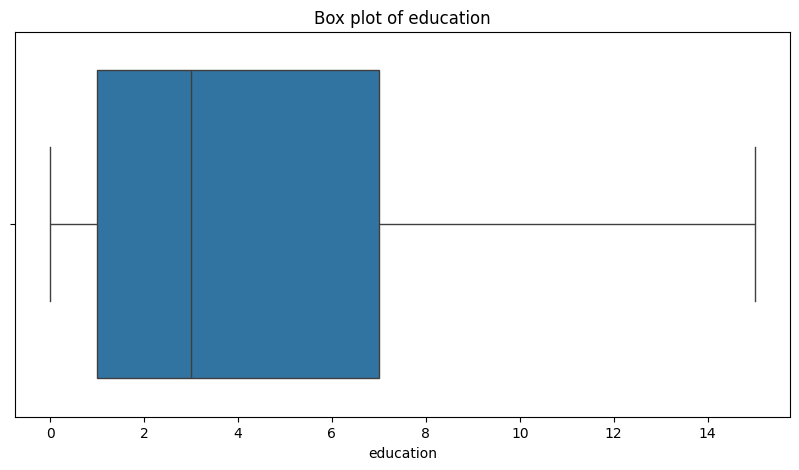

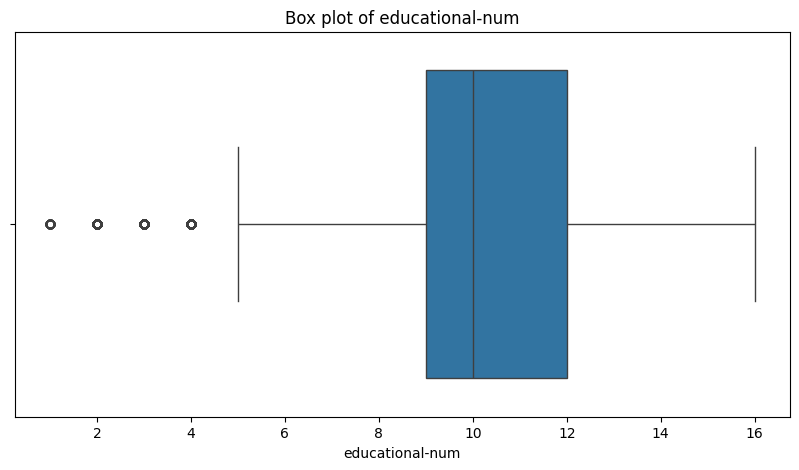

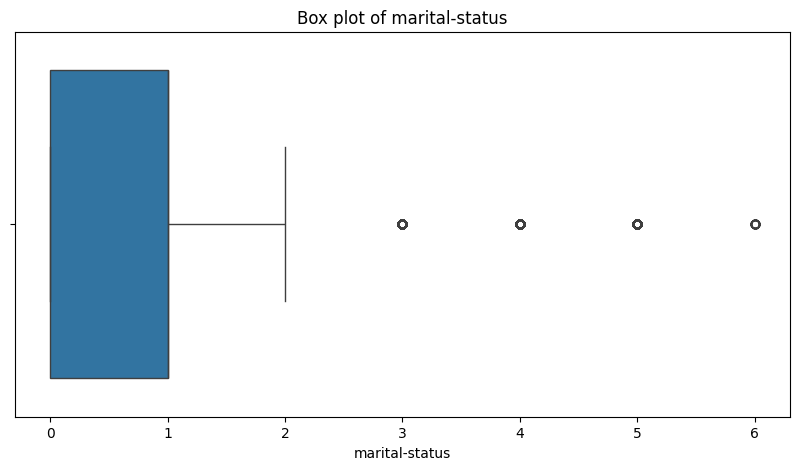

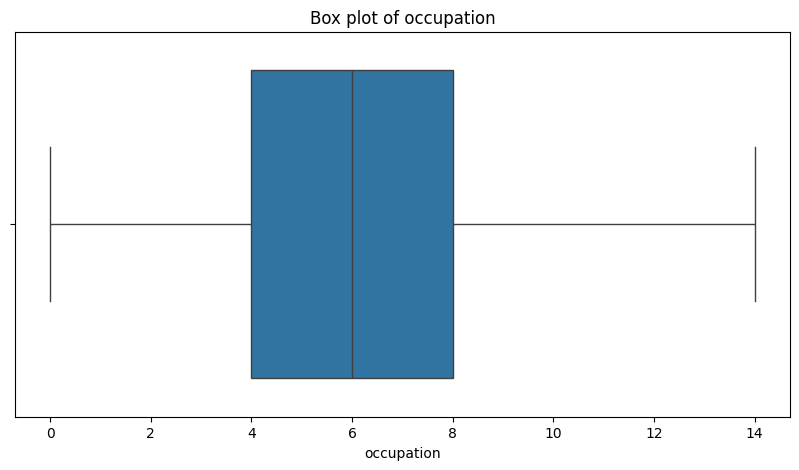

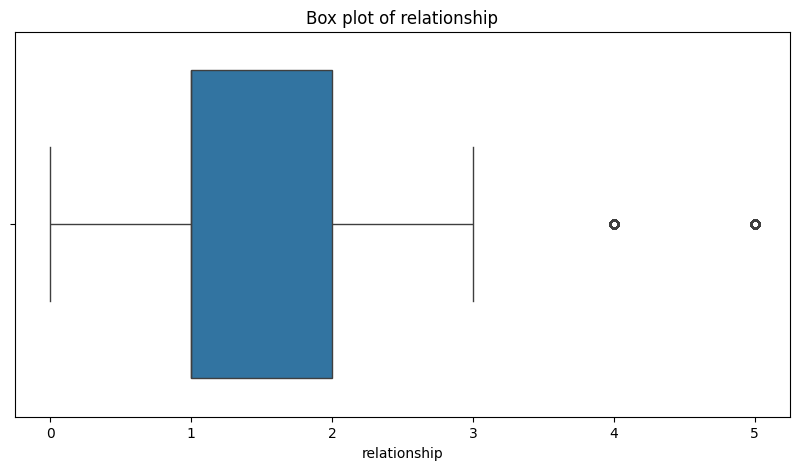

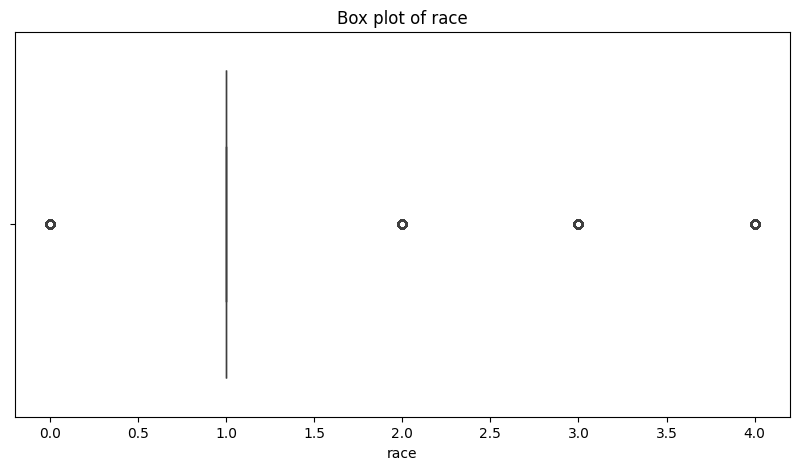

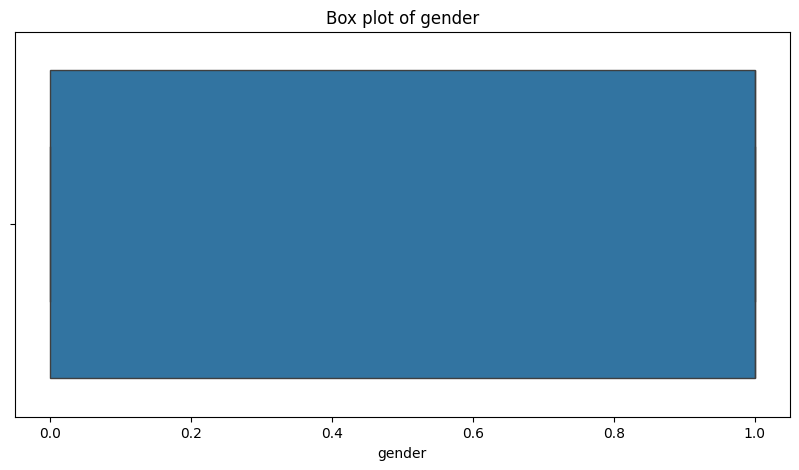

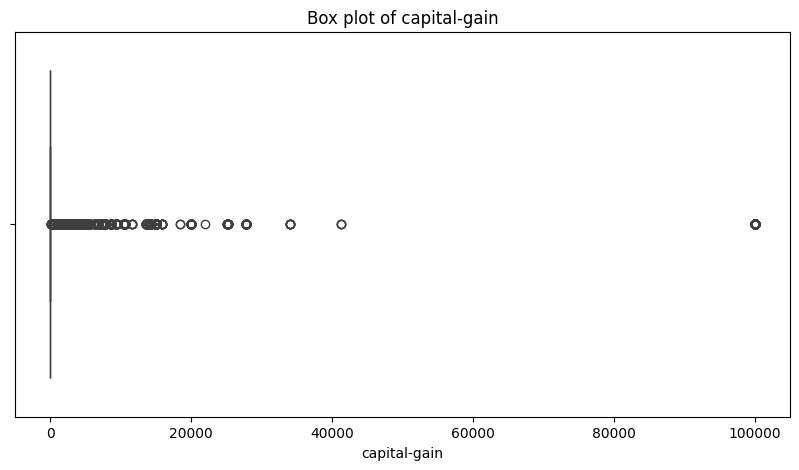

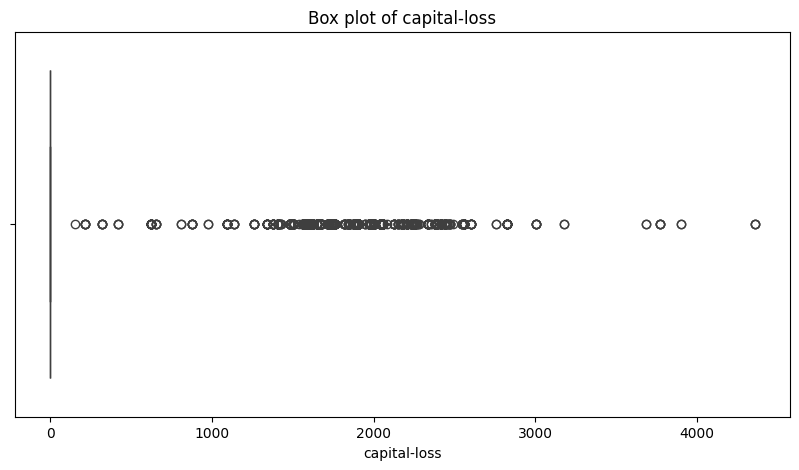

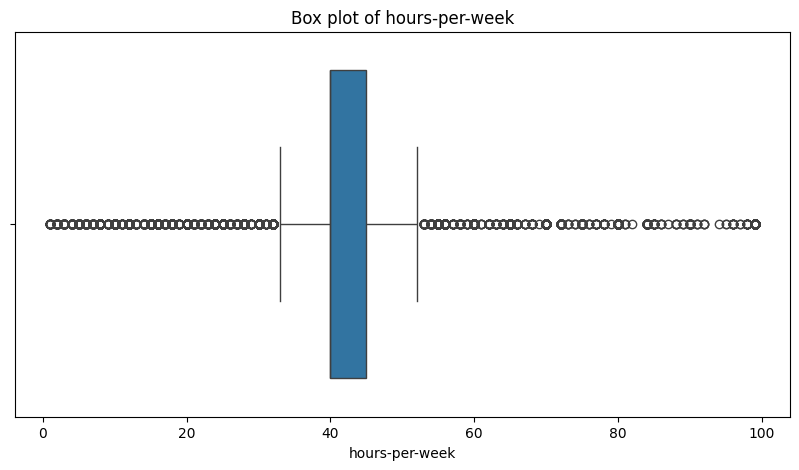

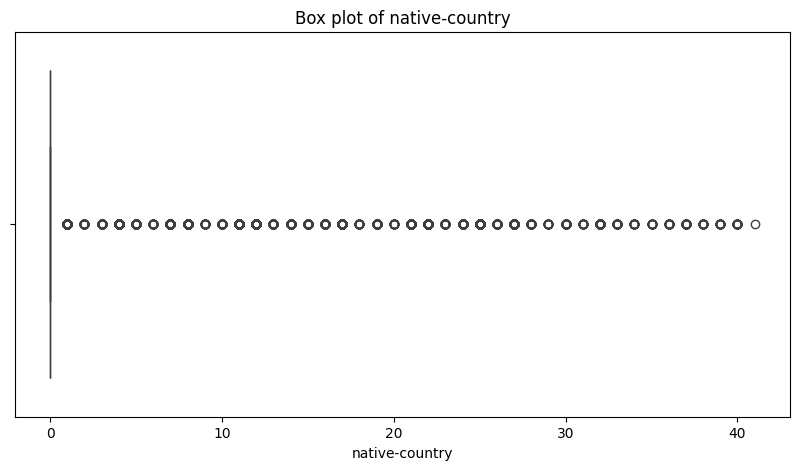

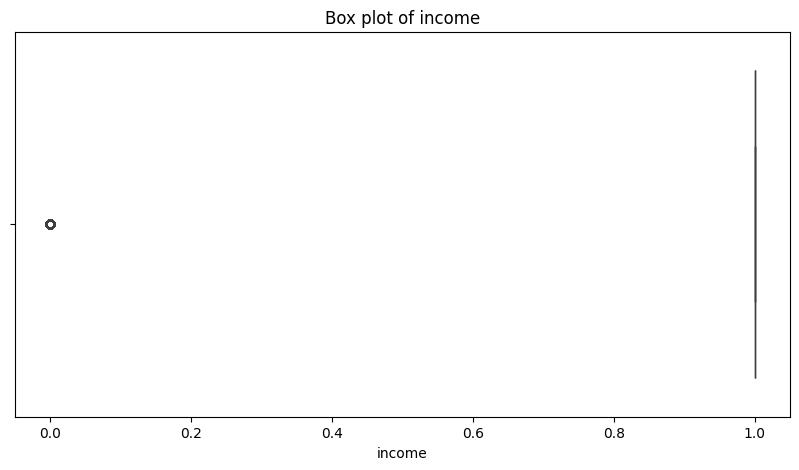

In [9]:
for column in df.columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[column])
    plt.title(f'Box plot of {column}')
    plt.show()

<Axes: >

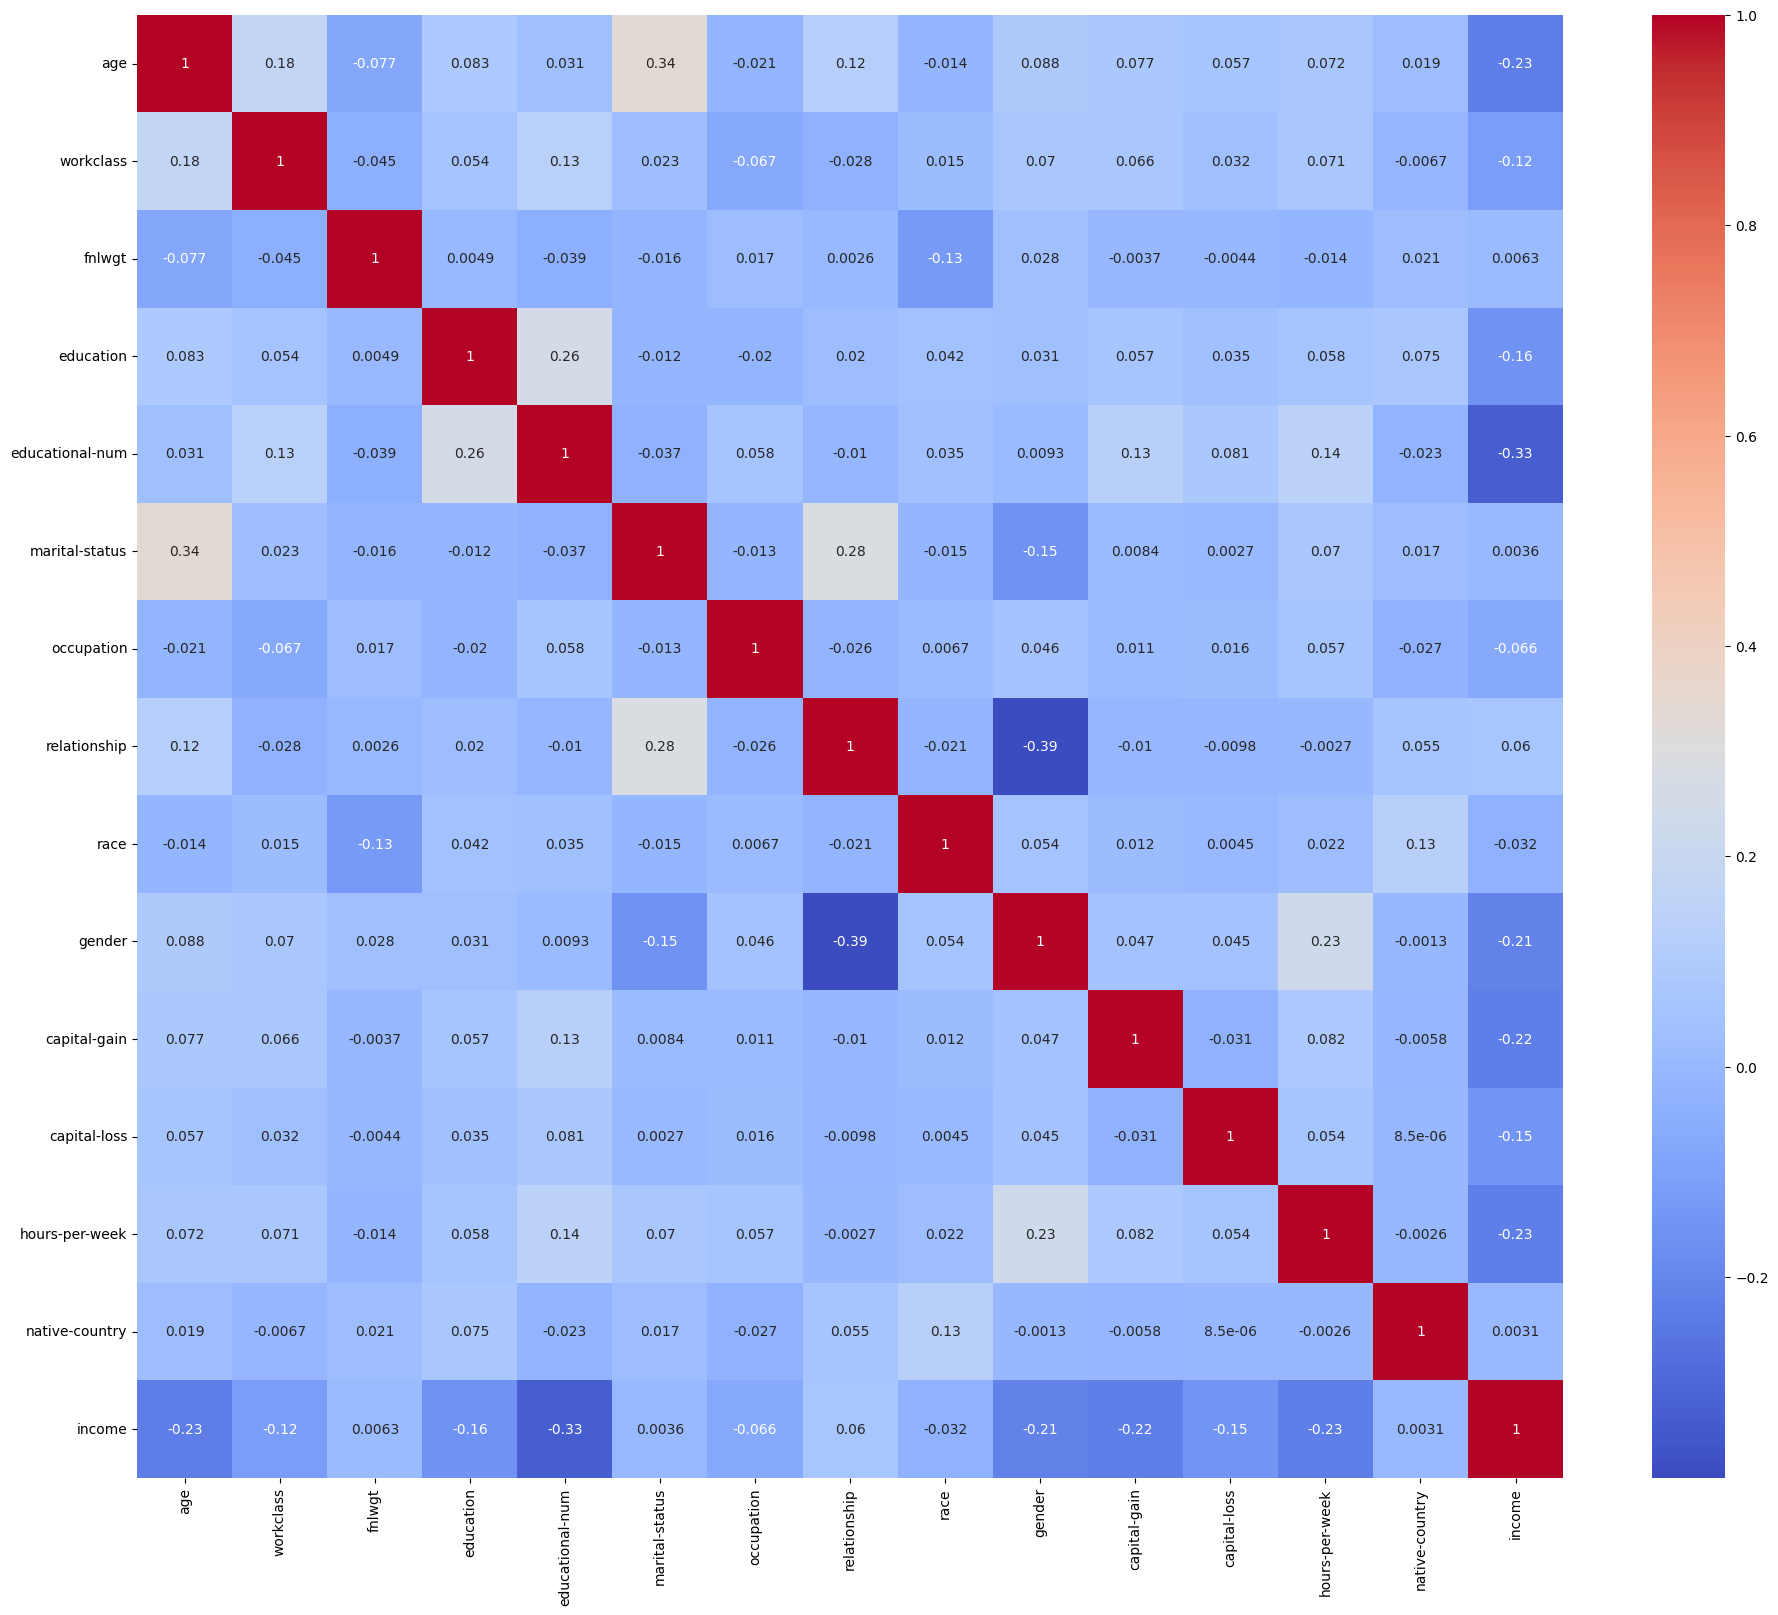

In [10]:

plt.figure(figsize=(23, 19))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [11]:
df.corr()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
age,1.000000,0.175448,-0.076628,0.083128,0.030940,0.340660,-0.020589,0.122638,-0.013759,0.088120,0.077229,0.056944,0.071558,0.018898,-0.230369
workclass,0.175448,1.000000,-0.045334,0.054431,0.134462,0.022773,-0.066940,-0.027583,0.015036,0.069786,0.066441,0.031679,0.071395,-0.006675,-0.117061
fnlwgt,-0.076628,-0.045334,1.000000,0.004889,-0.038761,-0.016426,0.016753,0.002615,-0.128775,0.027739,-0.003706,-0.004366,-0.013519,0.020751,0.006339
education,0.083128,0.054431,0.004889,1.000000,0.256100,-0.011891,-0.020108,0.020346,0.042265,0.030555,0.056679,0.035468,0.057752,0.075134,-0.160178
educational-num,0.030940,0.134462,-0.038761,0.256100,1.000000,-0.037273,0.058223,-0.010374,0.034786,0.009328,0.125146,0.080972,0.143689,-0.022714,-0.332613
marital-status,0.340660,0.022773,-0.016426,-0.011891,-0.037273,1.000000,-0.013040,0.284348,-0.015249,-0.153760,0.008431,0.002681,0.070024,0.017458,0.003602
occupation,-0.020589,-0.066940,0.016753,-0.020108,0.058223,-0.013040,1.000000,-0.026309,0.006670,0.046287,0.010788,0.015520,0.056997,-0.027430,-0.065845
relationship,0.122638,-0.027583,0.002615,0.020346,-0.010374,0.284348,-0.026309,1.000000,-0.020644,-0.391131,-0.009970,-0.009780,-0.002686,0.055040,0.060166
race,-0.013759,0.015036,-0.128775,0.042265,0.034786,-0.015249,0.006670,-0.020644,1.000000,0.053702,0.011933,0.004471,0.021727,0.125901,-0.032272
gender,0.088120,0.069786,0.027739,0.030555,0.009328,-0.153760,0.046287,-0.391131,0.053702,1.000000,0.047094,0.045480,0.228560,-0.001284,-0.214628


In [12]:
df.corr()["income"].sort_values(ascending=False).abs().sort_values(ascending=False)


income             1.000000
educational-num    0.332613
age                0.230369
hours-per-week     0.227687
capital-gain       0.223013
gender             0.214628
education          0.160178
capital-loss       0.147554
workclass          0.117061
occupation         0.065845
relationship       0.060166
race               0.032272
fnlwgt             0.006339
marital-status     0.003602
native-country     0.003138
Name: income, dtype: float64

In [13]:
print(df.isnull())
print(df.isnull().sum())


         age  workclass  fnlwgt  education  educational-num  marital-status  \
0      False      False   False      False            False           False   
1      False      False   False      False            False           False   
2      False      False   False      False            False           False   
3      False      False   False      False            False           False   
4      False      False   False      False            False           False   
...      ...        ...     ...        ...              ...             ...   
48837  False      False   False      False            False           False   
48838  False      False   False      False            False           False   
48839  False      False   False      False            False           False   
48840  False      False   False      False            False           False   
48841  False      False   False      False            False           False   

       occupation  relationship   race  gender  cap

In [14]:
df.dropna(inplace=True)


In [15]:
df.drop_duplicates()
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,0,226802,0,7,0,0,0,0,1,0,0,40,0,1
1,38,0,89814,1,9,1,1,1,1,1,0,0,50,0,1
2,28,1,336951,2,12,1,2,1,1,1,0,0,40,0,0
3,44,0,160323,3,10,1,0,1,0,1,7688,0,40,0,0
4,18,2,103497,3,10,0,3,0,1,0,0,0,30,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,0,257302,2,12,1,9,4,1,0,0,0,38,0,1
48838,40,0,154374,1,9,1,0,1,1,1,0,0,40,0,0
48839,58,0,151910,1,9,2,7,3,1,0,0,0,40,0,1
48840,22,0,201490,1,9,0,7,0,1,1,0,0,20,0,1


In [16]:
from scipy.stats import zscore
z_scores = np.abs(zscore(df))
threshold =13
outliers = np.where(z_scores > threshold)

In [17]:
print(f"Outlier rows: {outliers[0]}")


Outlier rows: [   83   346   357   418   692   702   882   992  1131  1154  1157  1226
  1343  1824  1900  2168  2222  2437  2812  2972  3191  3269  3887  3945
  4615  4701  4782  5013  5041  5223  5463  5471  5680  5773  6148  6295
  6312  6477  6523  6858  7024  7347  7356  7551  7552  7805  7854  8187
  8366  8654  8996  9279  9339  9421  9576  9671  9701  9795  9896 10078
 10207 10374 10414 10457 11146 11791 12159 12701 12832 12862 13039 13050
 13084 13178 13368 13817 14012 14450 14510 14624 15178 16021 16030 16037
 16068 17527 17649 17763 17809 17897 17963 18046 18052 18107 18384 18600
 18642 18988 19386 19456 19649 20117 20670 20702 20906 20937 21179 21379
 21465 21754 21869 22283 22316 22506 22805 23032 23371 23628 23798 23834
 23853 23910 24026 24723 24757 24991 25021 25023 25465 25509 25954 26041
 26647 26942 27052 27129 27243 27245 27766 28257 28343 28374 28422 28814
 28820 28936 28958 29190 29703 29736 29780 30278 30398 30519 30860 31108
 31381 31560 31885 32018 32185 32360 

In [18]:
outlier_rows = """[7913  9234 12681 14417 19738 19738 21503 24369 25069 27992 30522 30827
 31636 32006 32799 34188 36448 39813 41072 46740]"""
outlier_rows = outlier_rows[1:-1]
outlier_list = outlier_rows.split()
# outlier_list = [int(i) for i in outlier_list]
outlier_list = list(map(int , outlier_list))
outlier_list

[7913,
 9234,
 12681,
 14417,
 19738,
 19738,
 21503,
 24369,
 25069,
 27992,
 30522,
 30827,
 31636,
 32006,
 32799,
 34188,
 36448,
 39813,
 41072,
 46740]

In [19]:
df = df.drop(outlier_list)
df = df.reset_index(drop=True)

In [20]:
# !pip install imblearn
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

In [21]:
x= df.drop("income" , axis=1)
y = df["income"]

In [22]:
print(f"Class distribution before balancing:\n{y.value_counts()}")


Class distribution before balancing:
income
1    37140
0    11683
Name: count, dtype: int64


In [23]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(x, y)


In [24]:
print(f"Class distribution before balancing:\n{y_resampled.value_counts()}")


Class distribution before balancing:
income
1    37140
0    37140
Name: count, dtype: int64


In [25]:

from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)




In [26]:
scaler = MinMaxScaler()

X_train_normalized = scaler.fit_transform(X_train)

X_test_normalized = scaler.transform(X_test)

In [27]:
!pip install catboost


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 8.8 MB/s eta 0:00:00


In [28]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier

import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier


In [29]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train_normalized, y_train)
y_pred = model.predict(X_test_normalized)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

0.889158140369772
              precision    recall  f1-score   support

           0       0.89      0.89      0.89     11156
           1       0.89      0.89      0.89     11128

    accuracy                           0.89     22284
   macro avg       0.89      0.89      0.89     22284
weighted avg       0.89      0.89      0.89     22284

Confusion Matrix:
[[9955 1201]
 [1269 9859]]


In [30]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

0.6222401723209477
              precision    recall  f1-score   support

           0       0.84      0.31      0.45     11156
           1       0.57      0.94      0.71     11128

    accuracy                           0.62     22284
   macro avg       0.71      0.62      0.58     22284
weighted avg       0.71      0.62      0.58     22284

Confusion Matrix:
[[ 3404  7752]
 [  666 10462]]


In [31]:
# Create and train GBM classifier
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train, y_train)

# Predict using GBM classifier
y_pred_gbm = gbm_model.predict(X_test)

# Evaluate GBM classifier
accuracy_gbm = accuracy_score(y_test, y_pred_gbm)
report_gbm = classification_report(y_test, y_pred_gbm)

print("\nGradient Boosting Machines (GBM)")
print(f"Accuracy: {accuracy_gbm}")
print("Classification Report:")
print(report_gbm)



Gradient Boosting Machines (GBM)
Accuracy: 0.8702207862143242
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87     11156
           1       0.88      0.86      0.87     11128

    accuracy                           0.87     22284
   macro avg       0.87      0.87      0.87     22284
weighted avg       0.87      0.87      0.87     22284



In [32]:
y_pred_test = model.predict(X_train)
print(accuracy_score(y_train, y_pred_test))
print(classification_report(y_train, y_pred_test))
conf_matrix = confusion_matrix(y_train, y_pred_test)
print(f'Confusion Matrix:\n{conf_matrix}')


0.6260289253019463
              precision    recall  f1-score   support

           0       0.85      0.31      0.45     25984
           1       0.58      0.94      0.72     26012

    accuracy                           0.63     51996
   macro avg       0.71      0.63      0.58     51996
weighted avg       0.71      0.63      0.58     51996

Confusion Matrix:
[[ 8001 17983]
 [ 1462 24550]]


In [42]:
import xgboost as xgb

model = xgb.XGBClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred_xgb = model.predict(X_test)
accuracy_score_xgb = accuracy_score(y_test, y_pred_xgb)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred_xgb))
conf_matrix = confusion_matrix(y_test, y_pred_xgb)
print(f'Confusion Matrix:\n{conf_matrix}')


0.8964728056004309
              precision    recall  f1-score   support

           0       0.90      0.89      0.90     11156
           1       0.89      0.90      0.90     11128

    accuracy                           0.90     22284
   macro avg       0.90      0.90      0.90     22284
weighted avg       0.90      0.90      0.90     22284

Confusion Matrix:
[[ 9920  1236]
 [ 1071 10057]]


In [43]:
y_pred_train_xgb = model.predict(X_train)
print(accuracy_score(y_train, y_pred_train_xgb))
accuracy_score_train_xgb = accuracy_score(y_train, y_pred_train_xgb)
print(classification_report(y_train, y_pred_train_xgb))
conf_matrix = confusion_matrix(y_train, y_pred_train_xgb)
print(f'Confusion Matrix:\n{conf_matrix}')


0.9186475882760212
              precision    recall  f1-score   support

           0       0.92      0.91      0.92     25984
           1       0.91      0.93      0.92     26012

    accuracy                           0.92     51996
   macro avg       0.92      0.92      0.92     51996
weighted avg       0.92      0.92      0.92     51996

Confusion Matrix:
[[23679  2305]
 [ 1925 24087]]


<BarContainer object of 5 artists>

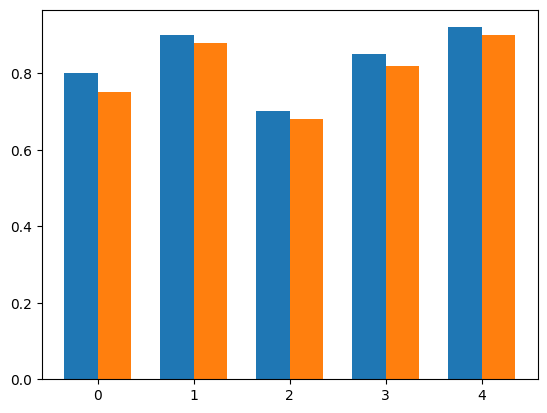

In [41]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the plot
methods = ['xgb', 'Method 2', 'Method 3', 'Method 4', 'Method 5']
train_acc = [accuracy_score_train_xgb, 0.9, 0.7, 0.85, 0.92]
test_acc = [accuracy_score_xgb, 0.88, 0.68, 0.82, 0.9]

# Create the figure and axis
fig, ax = plt.subplots()

# Create the bar plot
bar_width = 0.35
x = np.arange(len(methods))

ax.bar(x - bar_width/2, train_acc, bar_width, label='Training Accuracy')
ax.bar(x + bar_width/2, test_acc, bar_width, label='Testing Accuracy')

In [35]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [ 10, 30],
    'min_samples_split': [2, 5],


}


In [36]:
# Initialize the RandomForestClassifier
# from sklearn.model_selection import train_test_split, GridSearchCV

# rf = RandomForestClassifier(random_state=42)

# # Initialize GridSearchCV
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# # Fit GridSearchCV
# grid_search.fit(X_train, y_train)

# # Get the best parameters
# best_params = grid_search.best_params_
# print(f'Best parameters found: {best_params}')


In [37]:
# # Train the model with the best parameters
# best_rf = grid_search.best_estimator_
# best_rf.fit(X_train, y_train)

# # Make predictions
# y_pred = best_rf.predict(X_test)

# # Evaluate the model
# report = classification_report(y_test, y_pred)
# print(report)
